# PART 1

In [276]:
import numpy as np

# datas in mexican hat format
X_hat = np.array([0.2, 0.4, 0.66, 0.9, 0.99, 0.95, 0.78, 0.44, 0.27])
X = np.array([.27,.44,.78,.4,.2,.99,.9,.95,.66])

# hyper parameters
R1 = 1
R2 = 2
C1 = 0.6
C2 = -0.4
t_max = 4

In [277]:
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt

def f_x(x):
  res = np.where(x<0, 0, np.where(x>=2, 2, x))
  return res

def Mexiacan_Hat(X, C1, C2, R1, R2):
  x = np.zeros(X.shape)

  for i in range(len(X)):
    indices_R1 = np.array(range(i-R1, i+R1+1))
    indices_R1 = np.delete(indices_R1, np.where(indices_R1<0))
    indices_R1 = np.delete(indices_R1, np.where(indices_R1 > len(X)-1))

    indices_R2 = np.array(range(i-R2, i+R2+1))
    indices_R2 = np.delete(indices_R2, np.where(indices_R2<0))
    indices_R2 = np.delete(indices_R2, np.where(indices_R2 >=len(X)-1))
    indices_R2 = np.array(list(set(indices_R2) - set(indices_R1)))

    x[i] = C1 * X[indices_R1].sum() + C2 * X[indices_R2].sum()

  return f_x(x)

def iteration(X, t, C1, C2, R1, R2):
  x_old = deepcopy(X)
  xs = []
  for j in range(t):
    x_new = Mexiacan_Hat(x_old, C1, C2, R1, R2)
    x_old = x_new
    xs.append(x_new)

  xs = pd.DataFrame(xs)
  xs.T.plot()
  plt.show()

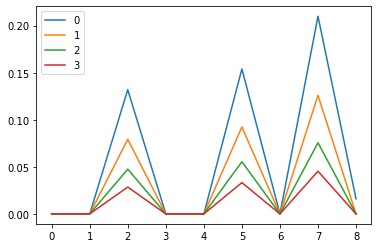

In [278]:
R1 = 0
R2 = 1
iteration(X, t_max, C1, C2, R1, R2)

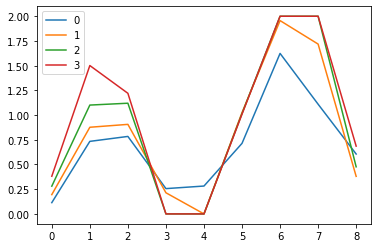

In [279]:
R1 = 1
R2 = 2
iteration(X, t_max, C1, C2, R1, R2)

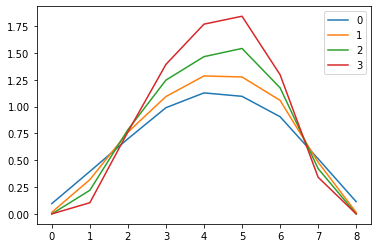

In [280]:
# iteration mexican style
R1 = 1
R2 = 2
iteration(X_hat, t_max, C1, C2, R1, R2)

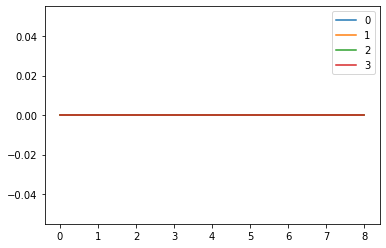

In [281]:
# iteration mexican style
R1 = 0
R2 = 1
iteration(X_hat, t_max, C1, C2, R1, R2)

# PART 2

In [377]:
def f_x(x):
  return np.where(x<0, 0, x)

def MaxNet(x, epsilon):
  m = len(x)
  w = np.ones((m,m)) * -epsilon
  np.fill_diagonal(w, 1)

  return f_x(w.dot(x))

def iteration(x, epsilon):
  m = len(x)
  x_old = deepcopy(x)
  xs = []
  sort_indices = []
  for j in range(1000):
    x_new = MaxNet(x_old, epsilon)

    for i in range(m):
      if x_old[i] == 0 and i not in sort_indices:
        sort_indices.append(i)

    x_old = x_new
    xs.append(x_new)
    
    if np.count_nonzero(x_new) == 1:
      break
      
  xs = pd.DataFrame(xs)

  return xs, sort_indices

In [373]:
iteration(X,.1)[0]

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.29900,0.0,0.0,0.530000,0.431000,0.486000,0.167
1,0.0,0.0,0.13760,0.0,0.0,0.391700,0.282800,0.343300,0.000
2,0.0,0.0,0.03582,0.0,0.0,0.315330,0.195540,0.262090,0.000
3,0.0,0.0,0.00000,0.0,0.0,0.265985,0.134216,0.207421,0.000
4,0.0,0.0,0.00000,0.0,0.0,0.231821,0.086875,0.167401,0.000
5,0.0,0.0,0.00000,0.0,0.0,0.206394,0.046953,0.135531,0.000
6,0.0,0.0,0.00000,0.0,0.0,0.188145,0.012761,0.110197,0.000
7,0.0,0.0,0.00000,0.0,0.0,0.175850,0.000000,0.090106,0.000
8,0.0,0.0,0.00000,0.0,0.0,0.166839,0.000000,0.072521,0.000
9,0.0,0.0,0.00000,0.0,0.0,0.159587,0.000000,0.055837,0.000


In [379]:
print(f'X: {X}')
print(f'sorted X: {X[iteration(X,.01)[1][::-1]]}')

X: [0.27 0.44 0.78 0.4  0.2  0.99 0.9  0.95 0.66]
sorted X: [0.9  0.78 0.66 0.44 0.4  0.27 0.2 ]
